# Check whether new initial and boundary conditions are reasonable

In [3]:
import xarray as xr
import numpy as np
import cmocean
import sys
sys.path.append('/home/users/birgal/')
import pickle

In [33]:
base_folder = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'

nemo_mesh = xr.open_dataset(f'{base_folder}bathymetry/mesh_mask-20240305.nc').isel(time_counter=0)

cesm2_icT = xr.open_dataset(f'{base_folder}initial-conditions/CESM2/CESM2-LE2_ens1011.001_ICs_ConsTemp_y1850.nc').isel(time_counter=0)
cesm2_orT = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.pop.h.TEMP.185001-185912.nc').isel(time=0)
cesm2_icS = xr.open_dataset(f'{base_folder}initial-conditions/CESM2/CESM2-LE2_ens1011.001_ICs_AbsSal_y1850.nc').isel(time_counter=0)
cesm2_orS = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.pop.h.SALT.185001-185912.nc').isel(time=0)

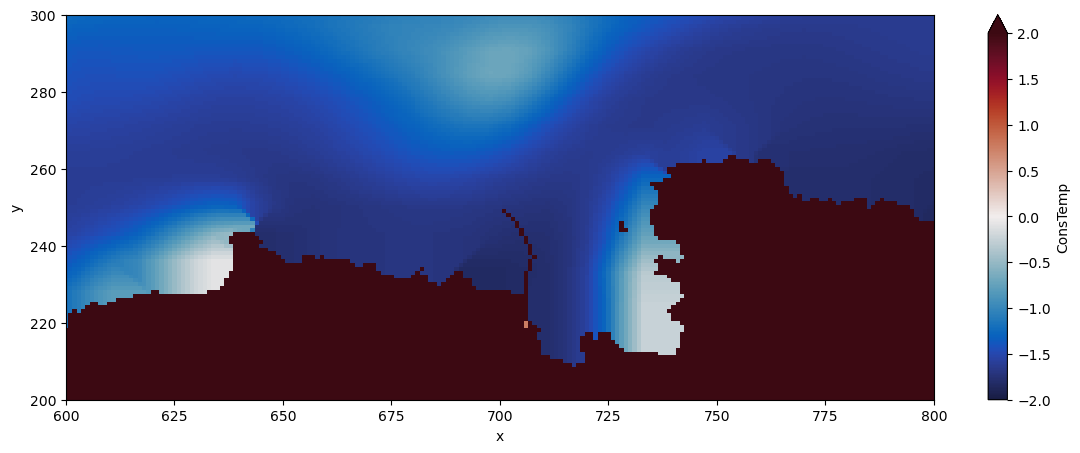

In [21]:
cesm2_icT['ConsTemp'].isel(deptht=0).plot(figsize=(14,5), vmin=-2, vmax=2, ylim=(200, 300), xlim=(600, 800), cmap=cmocean.cm.balance)

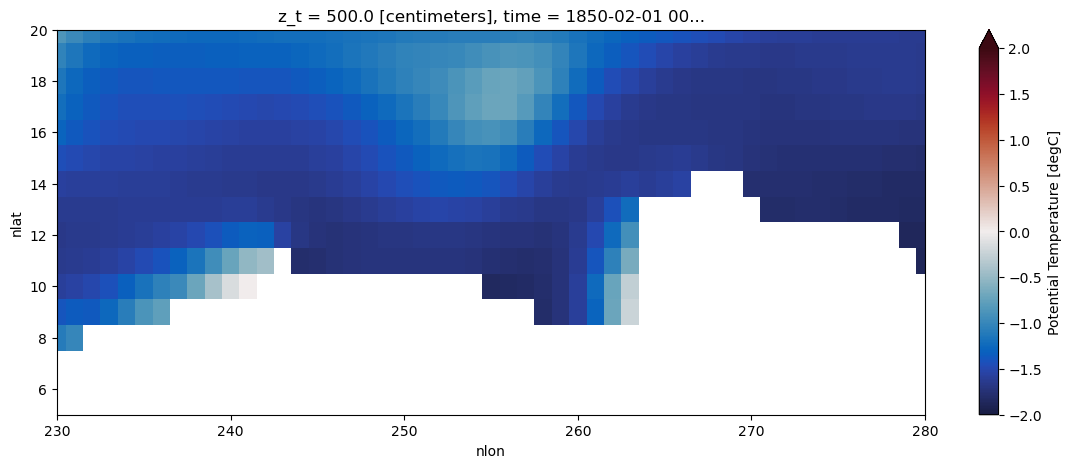

In [24]:
cesm2_orT['TEMP'].isel(z_t=0).plot(figsize=(14,5), ylim=(5,20), xlim=(230, 280), vmin=-2, vmax=2, cmap=cmocean.cm.balance)

In [47]:
cesm2_icT_plot = xr.where(cesm2_icT==9999, np.nan, cesm2_icT)

In [59]:
print((cesm2_orT.z_t.isel(z_t=33)*1e-2).values)
print(nemo_mesh.nav_lev.isel(nav_lev=52).values)

527.72797
530.8942


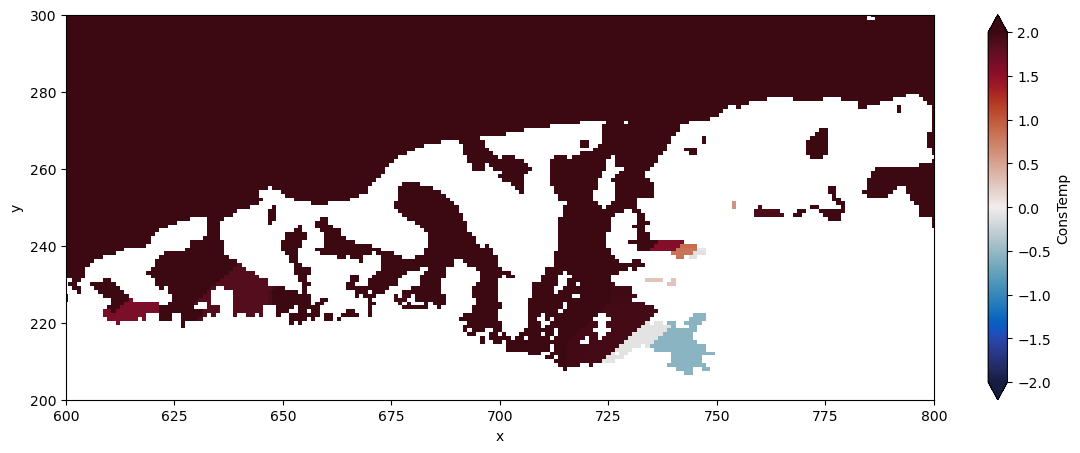

In [60]:
cesm2_icT_plot['ConsTemp'].isel(deptht=52).plot(figsize=(14,5), vmin=-2, vmax=2, ylim=(200, 300), xlim=(600, 800), cmap=cmocean.cm.balance)

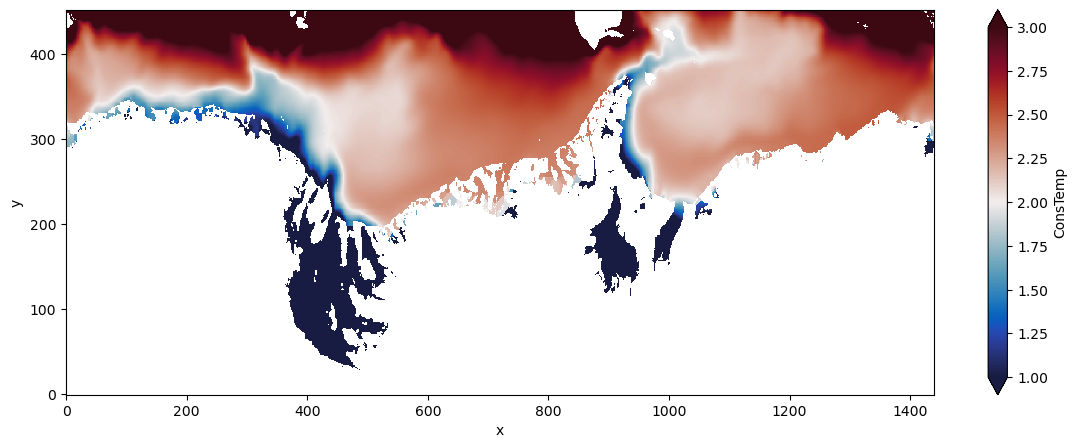

In [70]:
cesm2_icT_plot['ConsTemp'].isel(deptht=52).plot(figsize=(14,5), vmin=1, vmax=3, cmap=cmocean.cm.balance)

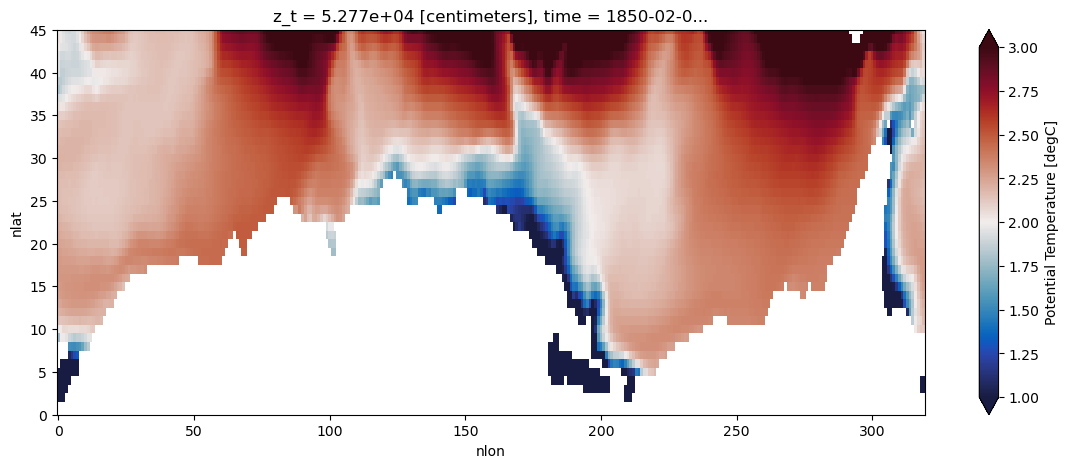

In [74]:
cesm2_orT['TEMP'].isel(z_t=33).plot(figsize=(14,5), ylim=(0,45), vmin=1, vmax=3, cmap=cmocean.cm.balance)

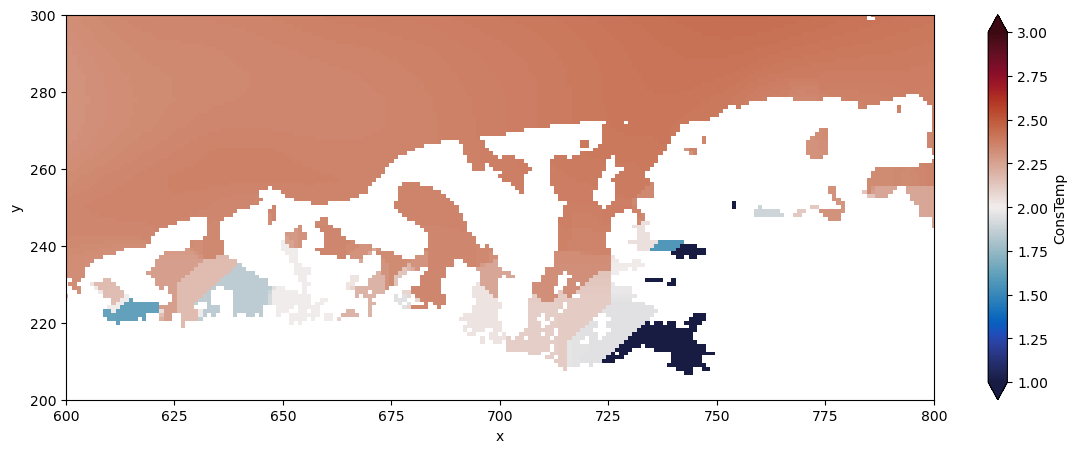

In [69]:
cesm2_icT_plot['ConsTemp'].isel(deptht=52).plot(figsize=(14,5), vmin=1, vmax=3, ylim=(200, 300), xlim=(600, 800), cmap=cmocean.cm.balance)

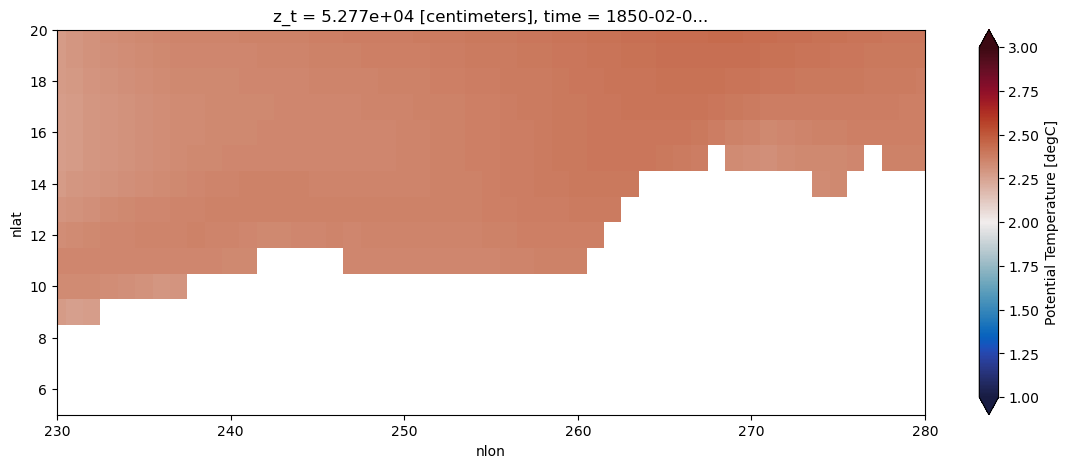

In [68]:
cesm2_orT['TEMP'].isel(z_t=33).plot(figsize=(14,5), ylim=(5,20), xlim=(230, 280), vmin=1, vmax=3, cmap=cmocean.cm.balance)